In [11]:
import os

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from Analysis.resources.costants import RESOURCES_DIRECTORY

sns.set()
import sklearn
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv(os.path.join(RESOURCES_DIRECTORY,"data.csv"))
clustering_data = data.drop(columns=['Name'])
clustering_data

,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
0,715176,715176,2.235941e-08,0.004471,66.232192,1,0,4817870,5.316861e+06
1,715176,715176,4.388900e-11,2877.018100,13.430700,0,0,4817870,5.316861e+06
2,715176,715176,2.235941e-08,131.386811,83.372801,1,1,4817870,5.316861e+06
3,715176,715176,4.388900e-11,2769.992000,15.145300,0,1,4817870,5.316861e+06
4,70656,70656,6.628463e-12,0.003326,4.461982,1,0,1825580,1.335081e+06
5,70656,70656,1.135900e-13,577.585200,2.557600,0,0,1825580,1.335081e+06
6,70656,70656,6.628463e-12,49.466571,5.382657,1,1,1825580,1.335081e+06
7,70656,70656,1.135900e-13,560.592000,2.723700,0,1,1825580,1.335081e+06
8,123440,123440,1.334161e-10,0.003326,10.917099,1,0,3085406,3.728473e+06
9,123440,123440,3.348600e-13,1187.708900,6.083400,0,0,3085406,3.728473e+06


# ALGORITHM

In [6]:
x = clustering_data.iloc[:,2:5].values # features
print(x)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

[[2.23594131e-08 4.47082520e-03 6.62321916e+01]
 [4.38890000e-11 2.87701810e+03 1.34307000e+01]
 [2.23594131e-08 1.31386811e+02 8.33728008e+01]
 [4.38890000e-11 2.76999200e+03 1.51453000e+01]
 [6.62846322e-12 3.32641602e-03 4.46198153e+00]
 [1.13590000e-13 5.77585200e+02 2.55760000e+00]
 [6.62846322e-12 4.94665709e+01 5.38265681e+00]
 [1.13590000e-13 5.60592000e+02 2.72370000e+00]
 [1.33416072e-10 3.32641602e-03 1.09170985e+01]
 [3.34860000e-13 1.18770890e+03 6.08340000e+00]
 [1.33416072e-10 3.32641602e-03 1.34831767e+01]
 [3.34860000e-13 1.14546800e+03 6.24180000e+00]
 [5.28117016e-05 3.32641602e-03 1.50775909e-02]
 [6.34820000e-07 3.61680000e+00 3.08220000e-02]
 [5.28117016e-05 2.66462326e+00 2.21555233e-02]
 [6.34820000e-07 0.00000000e+00 2.46990000e-02]
 [3.45256793e-09 2.10620559e+02 2.79392648e+01]
 [3.57660000e-12 3.26252950e+03 1.95037000e+01]
 [3.45256793e-09 3.32641602e-03 3.38106868e+01]
 [3.57660000e-12 3.20366000e+03 1.88832000e+01]
 [8.83677937e-10 3.32641602e-03 6.439601

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

# Elbow


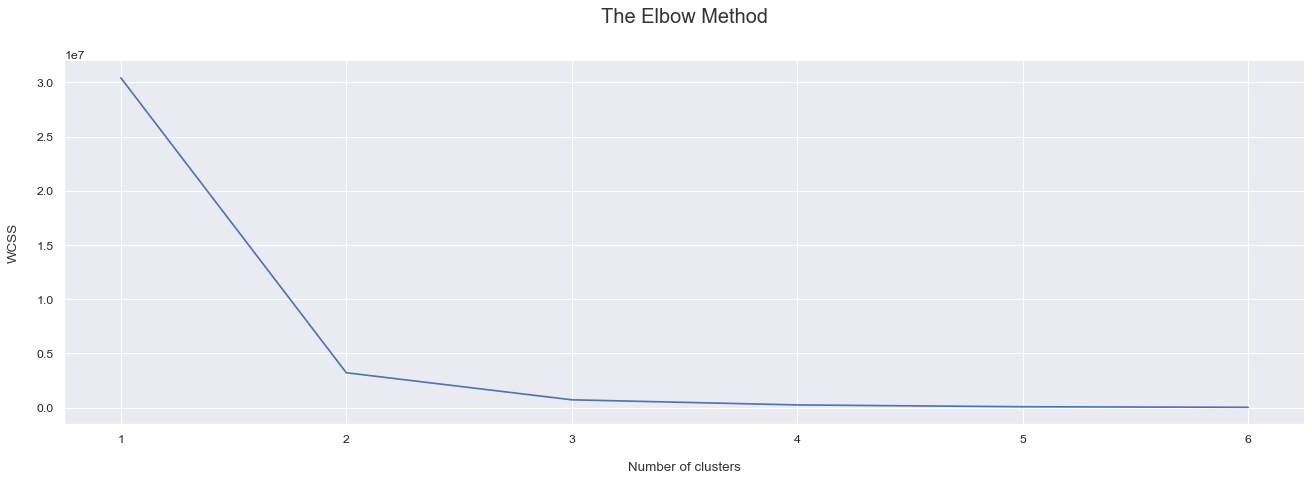

In [7]:

wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method', fontsize=18, color="#333533", pad=35)
plt.xlabel('Number of clusters', labelpad=15, fontsize=12, color="#333533")
plt.ylabel('WCSS', labelpad=15, fontsize=12, color="#333533")

# removing axes from the figure
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

# Visualization

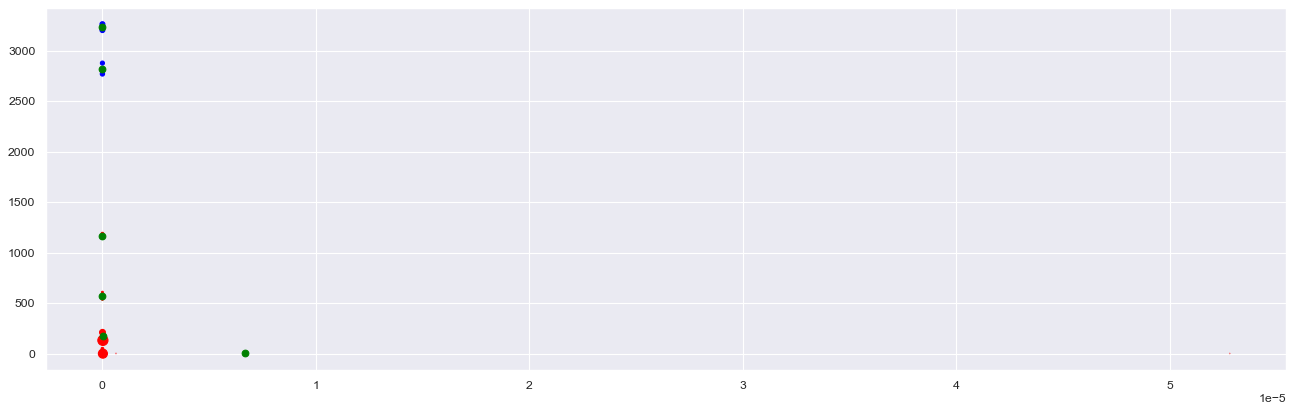

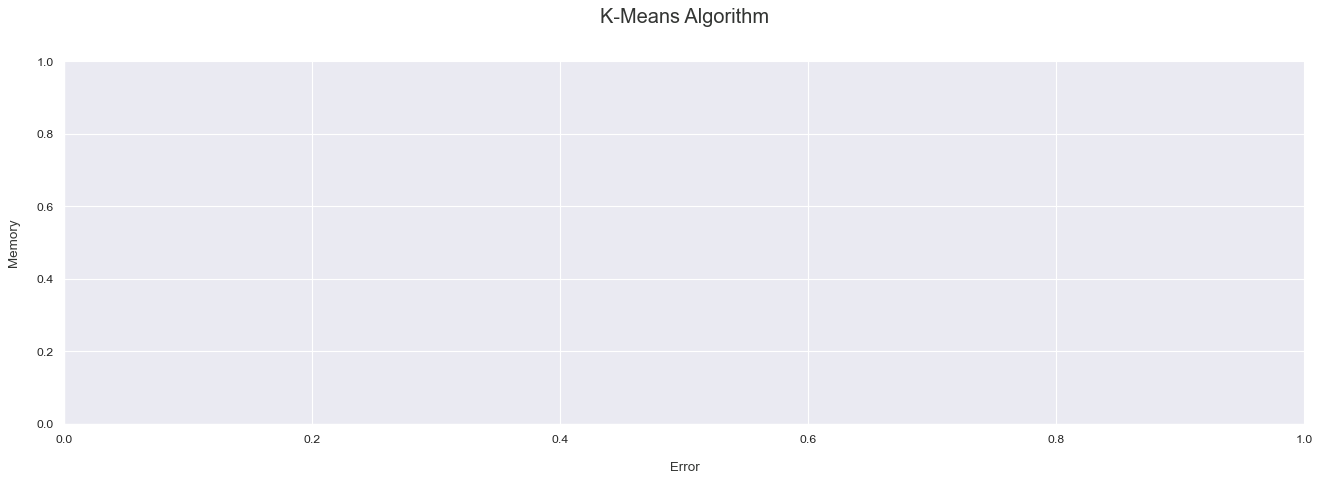

In [8]:
plt.figure(figsize=(20, 6), dpi=80)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], c= 'red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], c= 'blue', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c= 'green', label='Centroids')
plt.figure(figsize=(20, 6), dpi=80)
plt.title('K-Means Algorithm', fontsize=18, color="#333533", pad=35)
plt.xlabel('Error', labelpad=15, fontsize=12, color="#333533")
plt.ylabel('Memory', labelpad=15, fontsize=12, color="#333533")


# removing axes from the figure
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()


# Clustering

Clustering sulle matrici, per analizzare la suddivisione automatica scaturita da un k-means, con una conseguente interpretazione dei cluster risultanti

L’algoritmo è stato provato sia con k=3 che k=4, ma il secondo dà risultati più sensati

L’attributo Cond è stato rimosso, perchè sfasava l'esecuzione

- (Piccole): ex15 ed shallow_water sono tra le più piccole, e inoltre hanno una forma simile, con i dati distribuiti attorno alla diagonale principale, quindi ci sta che siano insieme
- (Medie): cfd1 e cfd2 si trovano insieme, il che era prevedibile essendo due matrci molto simili, sia per dimensioni che forma
- (Grandi): parabolic_fem si trova isolata insieme ad apache2, il che va bene, dal momento che sono quelle con la forma più particolare, dimensioni simili
- (Molto Grande): G3 resta isolato, e ha senso perchè è la più grande, ha una forma particolare e poche proprietà in comune con le altre

Il clustering risultante sembra essere fatto molto bene, in quanto non si sofferma a classificare le matrici esclusivamente in base alla loro dimensione, ma tiene conto anche delle altre proprietà delle matrici, come dimostarto dal fatto che sebbene cfd1 sia leggermente più piccola di shallow_water, si trova comunque nel cluster assieme alla matrice “sorella” cfd2

In [12]:
# Convert DataFrame to matrix
agg_data = pd.read_csv(os.path.join(RESOURCES_DIRECTORY,"data_aggregation.csv"))

clustering_data = agg_data.drop(columns=['Name', 'Cond'])
mat = clustering_data.values

# Using sklearn
km = sklearn.cluster.KMeans(n_clusters=4)
km.fit(mat)

# Get cluster assignment labels
labels = km.labels_

# Format results as a DataFrame
agg_data["cluster"] = labels
agg_data.sort_values(by="cluster", inplace=True)
agg_data


,Name,Rows,errorMat,errorPy,memoryMat,memoryPy,timeMat,timePy,Nnz,Cond,cluster
1,cfd1,70656,1.135900e-13,6.628463e-12,569.08860,24.734949,2.640650,4.922319,1825580,1.335081e+06,0
2,cfd2,123440,3.348600e-13,1.334161e-10,1166.58845,0.003326,6.162600,12.200138,3085406,3.728473e+06,0
4,G3_circuit,1585478,3.576600e-12,3.452568e-09,3233.09475,105.311943,19.193450,30.874976,7660826,2.238425e+07,1
0,apache2,715176,4.388900e-11,2.235941e-08,2823.50505,65.695641,14.288000,74.802496,4817870,5.316861e+06,2
5,parabolic_fem,525825,1.050000e-12,8.836779e-10,573.02630,0.003326,3.160100,7.180180,3674625,2.110820e+05,2
3,ex15,6867,6.348200e-07,5.281170e-05,1.80840,1.333975,0.027761,0.018617,98671,1.432642e+13,3
6,shallow_water1,81920,2.672800e-16,6.923992e-14,20.78310,4.535420,0.258710,0.680383,327680,3.628000e+00,3
